In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Programming Hero/Telco_customer_churn.xlsx')

In [ ]:
# Display the first 20 rows of the dataset
df.head(20)

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,Month-to-month,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds
6,8779-QRDMV,1,United States,California,Los Angeles,90022,"34.02381, -118.156582",34.023810,-118.156582,Male,...,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1,100,5433,Competitor offered more data
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,Month-to-month,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices
9,8665-UTDHZ,1,United States,California,Los Angeles,90029,"34.089953, -118.294824",34.089953,-118.294824,Male,...,Month-to-month,No,Electronic check,30.20,30.2,Yes,1,97,2915,Competitor had better devices


In [ ]:
# Display the shape (number of rows and columns) of the dataset
df.shape

(7043, 33)

In [ ]:
# Display the column names
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [ ]:
# Display summary statistics of the dataset
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [ ]:

# Display information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [ ]:
# Convert 'Total Charges' to numeric, handling errors by coercing to NaN
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

In [ ]:
# Check and handle missing values
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges          11
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [ ]:
# Display columns with missing values and their percentages
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Churn Reason,5174,0.734630
Total Charges,11,0.001562
Online Security,0,0.000000
CLTV,0,0.000000
Churn Score,0,0.000000
Churn Value,0,0.000000
Churn Label,0,0.000000
Monthly Charges,0,0.000000
Payment Method,0,0.000000
Paperless Billing,0,0.000000


In [ ]:
# Investigate and fill missing values in 'Total Charges' based on 'Tenure Months' and 'Monthly Charges'
df[df["Total Charges"].isna()]
df["Total Charges"].fillna(df["Tenure Months"] * df["Monthly Charges"], inplace=True)
df["Total Charges"].isna().sum()

0

In [ ]:
# Handle duplicates, if any
df.duplicated().sum()

0

# Feature Engineering and Selection

In [ ]:
# Create a copy of the DataFrame for feature engineering
df1 = df.copy()

In [ ]:
# Drop unnecessary columns
df1.drop(columns=["City", "Zip Code", "CustomerID", "Count", "Country", "State", "Lat Long", "Latitude", "Longitude",
                   "Churn Score", "Churn Label", "CLTV"], inplace=True, axis=1)

In [ ]:
# Display the number of unique values in each column
df1.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          3
Internet Service        3
Online Security         3
Online Backup           3
Device Protection       3
Tech Support            3
Streaming TV            3
Streaming Movies        3
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Reason           20
dtype: int64

In [ ]:
# Display the remaining columns after dropping unnecessary ones
df1.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value',
       'Churn Reason'],
      dtype='object')

In [ ]:
# List of columns to be one-hot encoded
columns = ["Gender", "Senior Citizen", "Partner", "Dependents", "Phone Service", "Multiple Lines", "Internet Service",
           'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
           'Contract', 'Paperless Billing', 'Payment Method', 'Churn Value']

In [ ]:
# Display unique values for each specified column
[print(f"{col} - {df1[col].unique()}\n") for col in columns]

Gender - ['Male' 'Female']

Senior Citizen - ['No' 'Yes']

Partner - ['No' 'Yes']

Dependents - ['No' 'Yes']

Phone Service - ['Yes' 'No']

Multiple Lines - ['No' 'Yes' 'No phone service']

Internet Service - ['DSL' 'Fiber optic' 'No']

Online Security - ['Yes' 'No' 'No internet service']

Online Backup - ['Yes' 'No' 'No internet service']

Device Protection - ['No' 'Yes' 'No internet service']

Tech Support - ['No' 'Yes' 'No internet service']

Streaming TV - ['No' 'Yes' 'No internet service']

Streaming Movies - ['No' 'Yes' 'No internet service']

Contract - ['Month-to-month' 'Two year' 'One year']

Paperless Billing - ['Yes' 'No']

Payment Method - ['Mailed check' 'Electronic check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

Churn Value - [1 0]



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
# Replace "No phone service" with "No" in the 'Multiple Lines' column
df1["Multiple Lines"].replace({"No phone service": "No"}, inplace=True)

In [ ]:
# Replace "No internet service" with "No" in multiple columns
mul_col = ["Online Security", "Device Protection", "Online Backup", "Tech Support", "Streaming TV", "Streaming Movies"]
[df1[col].replace("No internet service", "No", inplace=True) for col in mul_col]

[None, None, None, None, None, None]

In [ ]:
# Display the number of unique values in each column after transformations
df1.nunique()

Gender                  2
Senior Citizen          2
Partner                 2
Dependents              2
Tenure Months          73
Phone Service           2
Multiple Lines          2
Internet Service        3
Online Security         2
Online Backup           2
Device Protection       2
Tech Support            2
Streaming TV            2
Streaming Movies        2
Contract                3
Paperless Billing       2
Payment Method          4
Monthly Charges      1585
Total Charges        6531
Churn Value             2
Churn Reason           20
dtype: int64

In [ ]:
# Display information about the DataFrame after transformations
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             7043 non-null   object 
 1   Senior Citizen     7043 non-null   object 
 2   Partner            7043 non-null   object 
 3   Dependents         7043 non-null   object 
 4   Tenure Months      7043 non-null   int64  
 5   Phone Service      7043 non-null   object 
 6   Multiple Lines     7043 non-null   object 
 7   Internet Service   7043 non-null   object 
 8   Online Security    7043 non-null   object 
 9   Online Backup      7043 non-null   object 
 10  Device Protection  7043 non-null   object 
 11  Tech Support       7043 non-null   object 
 12  Streaming TV       7043 non-null   object 
 13  Streaming Movies   7043 non-null   object 
 14  Contract           7043 non-null   object 
 15  Paperless Billing  7043 non-null   object 
 16  Payment Method     7043 

In [ ]:
df1['Churn Value'].replace(to_replace='Yes', value=1, inplace=True)
df1['Churn Value'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
def encode_data(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
df1 = df1.apply(lambda x: encode_data(x))
df1.head()

,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,...,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Reason
0,1,0,0,0,2,1,0,0,1,1,...,0,0,0,0,1,3,53.85,108.15,1,3
1,0,0,0,1,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,13
2,0,0,0,1,8,1,1,1,0,0,...,0,1,1,0,1,2,99.65,820.50,1,13
3,0,0,1,1,28,1,1,1,0,0,...,1,1,1,0,1,2,104.80,3046.05,1,13
4,1,0,0,1,49,1,1,1,0,1,...,0,1,1,0,1,0,103.70,5036.30,1,2


In [ ]:
df1.groupby('Churn Value')['Churn Value'].count()

Churn Value
0    5174
1    1869
Name: Churn Value, dtype: int64

In [ ]:
# Map 'Senior Citizen' values to 1 and 0
df1['Senior Citizen'] = df1['Senior Citizen'].map({'Yes': 1, 'No': 0})

In [ ]:
# Cap the upper limit of 'Monthly Charges' at the 95th percentile
monthly_charges_upper_limit = df1['Monthly Charges'].quantile(0.95)
df1.loc[df1['Monthly Charges'] > monthly_charges_upper_limit, 'Monthly Charges'] = monthly_charges_upper_limit

In [ ]:
#Create new features
df1['Tenure Years'] = df1['Tenure Months'] / 12
df1['Monthly to Total Charges Ratio'] = df1['Monthly Charges'] / df1['Total Charges']

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming cat_col is a list of categorical columns
cat_col = ['Gender', 'Internet Service', 'Contract', 'Payment Method','Senior Citizen']

# Create an instance of LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column using apply and lambda function
df1[cat_col] = df1[cat_col].apply(lambda x: le.fit_transform(x))

# Display the updated DataFrame
print(df1.head())


   Gender  Senior Citizen  Partner  Dependents  Tenure Months  Phone Service  \
0       1               0        0           0              2              1   
1       0               0        0           1              2              1   
2       0               0        0           1              8              1   
3       0               0        1           1             28              1   
4       1               0        0           1             49              1   

   Multiple Lines  Internet Service  Online Security  Online Backup  ...  \
0               0                 0                1              1  ...   
1               0                 1                0              0  ...   
2               1                 1                0              0  ...   
3               1                 1                0              0  ...   
4               1                 1                0              1  ...   

   Streaming Movies  Contract  Paperless Billing  Payment Meth

Geographic Analysis of Churn

In [ ]:
# Extract relevant columns for geographic analysis
geo_columns = ['Country', 'State', 'City', 'Zip Code', 'Lat Long', 'Latitude', 'Longitude', 'Churn Label']
geo_df = df[geo_columns]

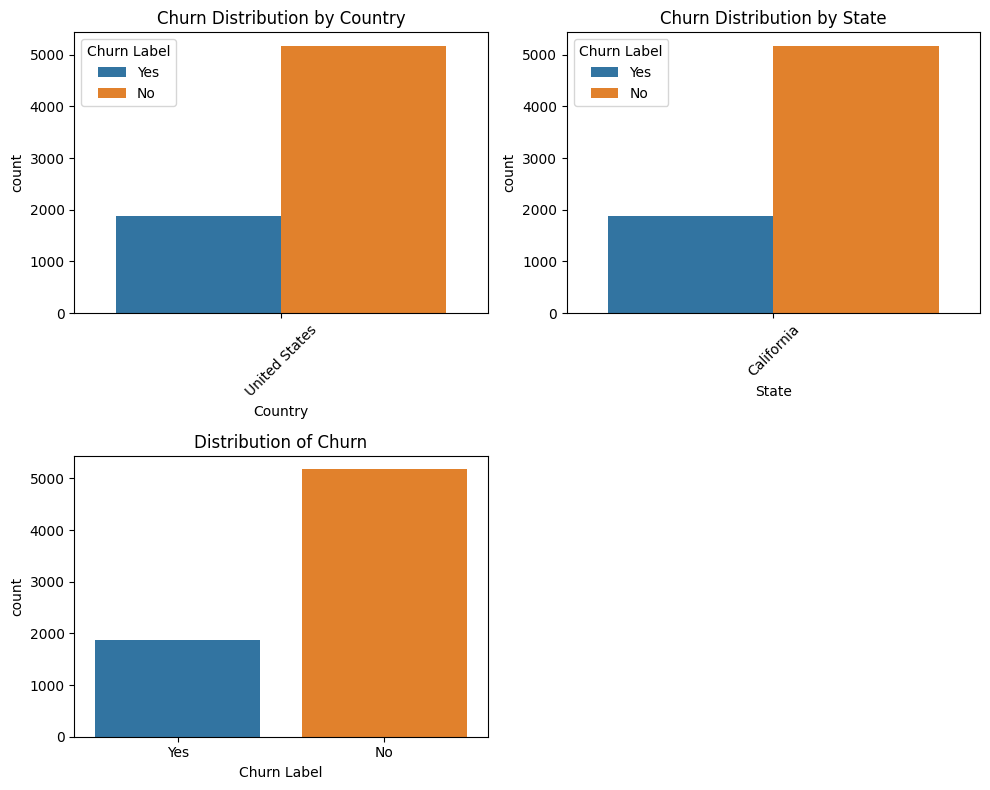

In [ ]:
# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Churn distribution by Country
sns.countplot(x='Country', hue='Churn Label', data=geo_df, ax=axes[0, 0])
axes[0, 0].set_title('Churn Distribution by Country')
axes[0, 0].tick_params(axis='x', rotation=45)

# Churn distribution by State
sns.countplot(x='State', hue='Churn Label', data=geo_df, ax=axes[0, 1])
axes[0, 1].set_title('Churn Distribution by State')
axes[0, 1].tick_params(axis='x', rotation=45)

# Explore the distribution of the target variable
sns.countplot(x='Churn Label', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Churn')

# Remove empty subplot
fig.delaxes(axes[1, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

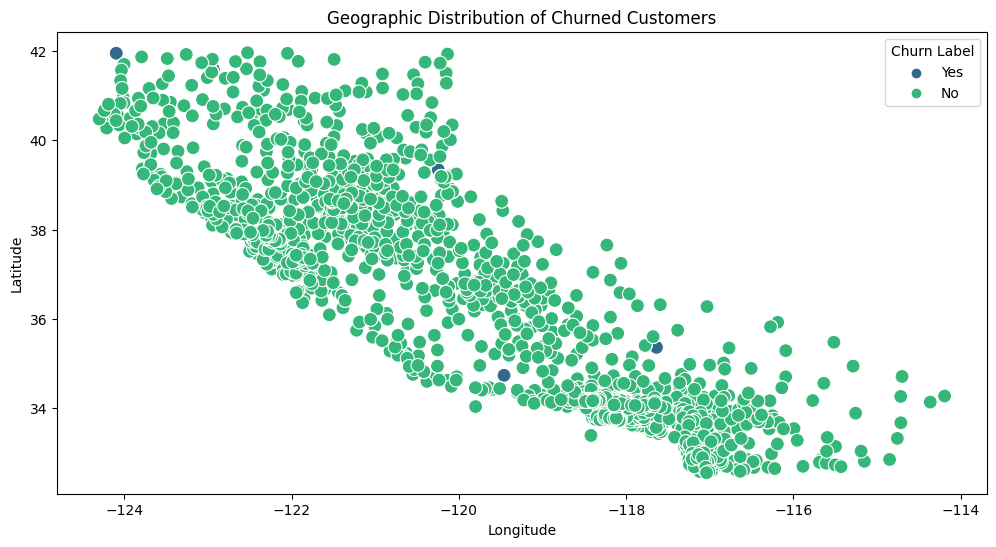

In [ ]:
# Explore the geographic distribution of churned customers
plt.figure(figsize=(12, 6))

# Customize this based on your dataset columns
sns.scatterplot(x='Longitude', y='Latitude', hue='Churn Label', data=df, palette='viridis', s=100)

plt.title('Geographic Distribution of Churned Customers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Demographic Analysis

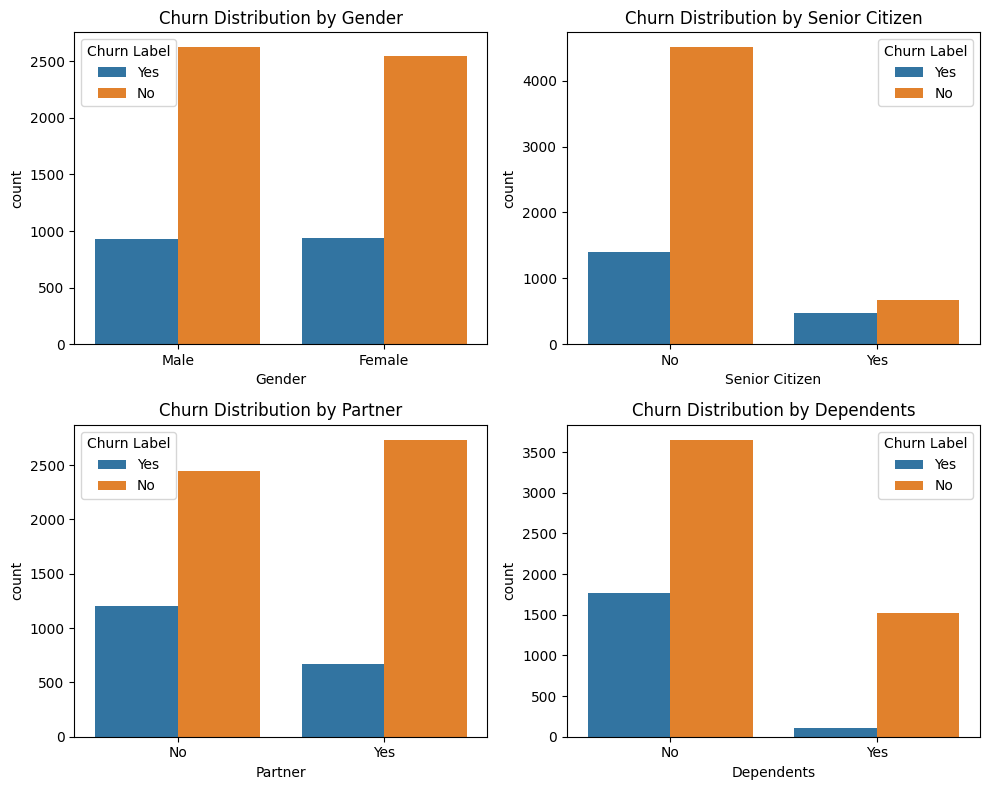

In [ ]:
# Extract relevant demographic columns
demo_columns = ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Churn Label']
demo_df = df[demo_columns]

# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Demographic analysis: Churn distribution by Gender
sns.countplot(x='Gender', hue='Churn Label', data=demo_df, ax=axes[0, 0])
axes[0, 0].set_title('Churn Distribution by Gender')

# Demographic analysis: Churn distribution by Senior Citizen status
sns.countplot(x='Senior Citizen', hue='Churn Label', data=demo_df, ax=axes[0, 1])
axes[0, 1].set_title('Churn Distribution by Senior Citizen')

# Demographic analysis: Churn distribution by Partner status
sns.countplot(x='Partner', hue='Churn Label', data=demo_df, ax=axes[1, 0])
axes[1, 0].set_title('Churn Distribution by Partner')

# Demographic analysis: Churn distribution by Dependents status
sns.countplot(x='Dependents', hue='Churn Label', data=demo_df, ax=axes[1, 1])
axes[1, 1].set_title('Churn Distribution by Dependents')

# Adjust layout
plt.tight_layout()
plt.show()

Service Utilization Analysis

In [ ]:
# Extract relevant service utilization columns
service_columns = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Streaming TV', 'Streaming Movies', 'Churn Label']
service_df = df[service_columns]

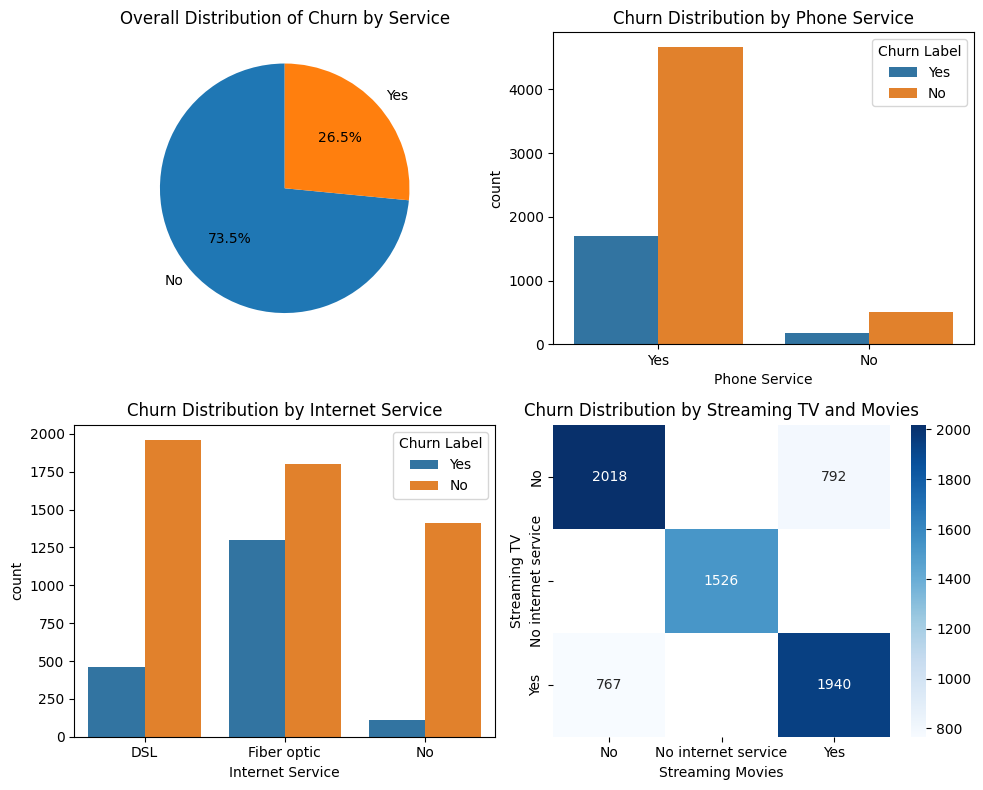

In [ ]:
# Set up a 2x2 grid for subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Overall distribution of Churn by Service (Pie Chart)
churn_distribution = service_df['Churn Label'].value_counts()
axes[0, 0].pie(churn_distribution, labels=churn_distribution.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Overall Distribution of Churn by Service')

# Churn distribution by Phone Service (Bar Chart)
sns.countplot(x='Phone Service', hue='Churn Label', data=service_df, ax=axes[0, 1])
axes[0, 1].set_title('Churn Distribution by Phone Service')

# Churn distribution by Internet Service (Bar Chart)
sns.countplot(x='Internet Service', hue='Churn Label', data=service_df, ax=axes[1, 0])
axes[1, 0].set_title('Churn Distribution by Internet Service')

# Churn distribution by combination of Streaming TV and Movies (Heatmap)
heatmap_data = service_df.groupby(['Streaming TV', 'Streaming Movies']).size().unstack()
sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='g', ax=axes[1, 1])
axes[1, 1].set_title('Churn Distribution by Streaming TV and Movies')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

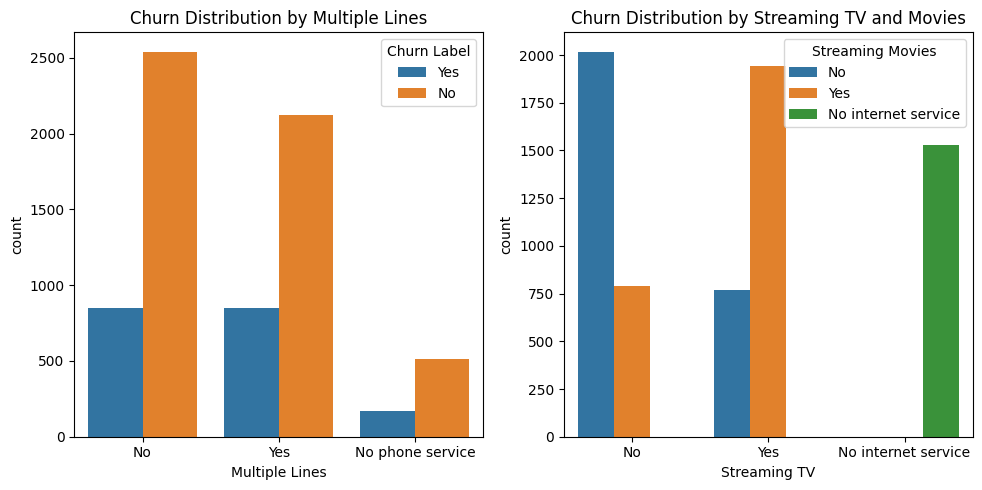

In [ ]:
# Set up a 1x2 grid for subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Churn distribution by Multiple Lines (Bar Chart)
sns.countplot(x='Multiple Lines', hue='Churn Label', data=service_df, ax=axes[0])
axes[0].set_title('Churn Distribution by Multiple Lines')

# Churn distribution by combination of Streaming TV and Movies (Bar Chart)
sns.countplot(x='Streaming TV', hue='Streaming Movies', data=service_df, ax=axes[1])
axes[1].set_title('Churn Distribution by Streaming TV and Movies')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

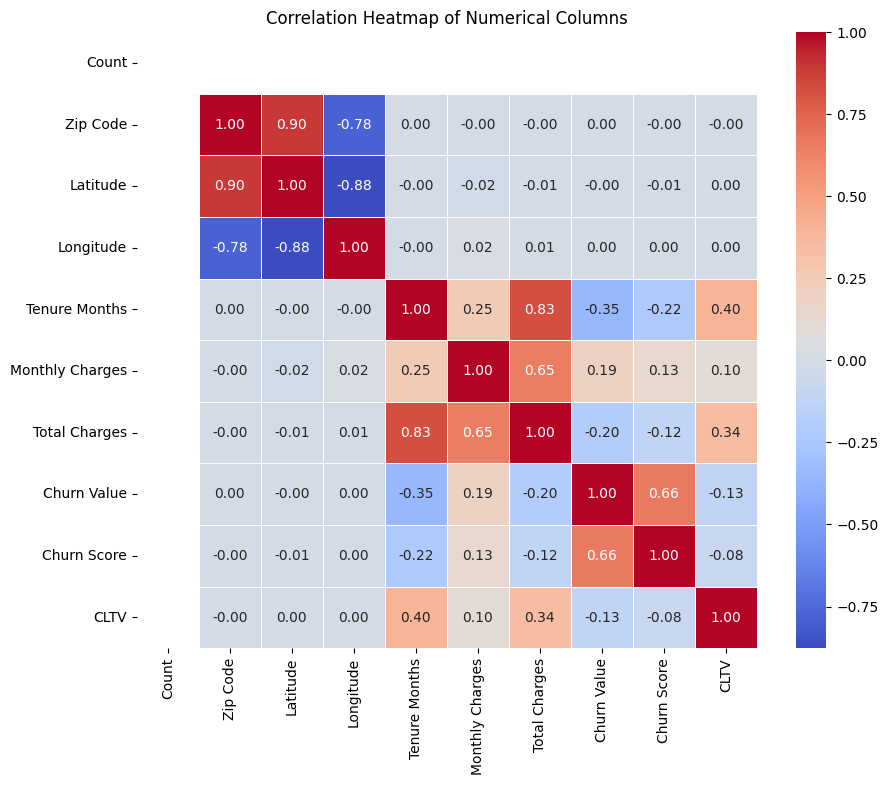

In [ ]:
# Select numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a heatmap with the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)

# Show the plot
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

**Train Test Split**

In [ ]:
X = df1.drop(['Churn Value'], axis=1)
y = df1['Churn Value']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting sets
print("Training set - Features:", X_train.shape)
print("Testing set - Features:", X_test.shape)
print("Training set - Target:", y_train.shape)
print("Testing set - Target:", y_test.shape)


Training set - Features: (4930, 22)
Testing set - Features: (2113, 22)
Training set - Target: (4930,)
Testing set - Target: (2113,)


Model Training

In [ ]:
num_col = X_train.select_dtypes(exclude="object")
numerical_columns = num_col.columns.tolist()

print("Numerical Columns:\n", numerical_columns)

Numerical Columns:
 ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Reason', 'Tenure Years', 'Monthly to Total Charges Ratio']


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Assuming num_col is a list of numerical column names
num_col = X_train.select_dtypes(exclude="object").columns.tolist()

# Replace infinite values with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Use SimpleImputer to fill NaN values with the mean
imputer = SimpleImputer(strategy='mean')

# Fit and transform the training data
X_train[num_col] = imputer.fit_transform(X_train[num_col])

# Transform the testing data using the parameters learned from the training data
X_test[num_col] = imputer.transform(X_test[num_col])

# Use StandardScaler
ss = StandardScaler()

# Fit and transform the training data
X_train[num_col] = ss.fit_transform(X_train[num_col])

# Transform the testing data using the parameters learned from the training data
X_test[num_col] = ss.transform(X_test[num_col])

LogisticRegression


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


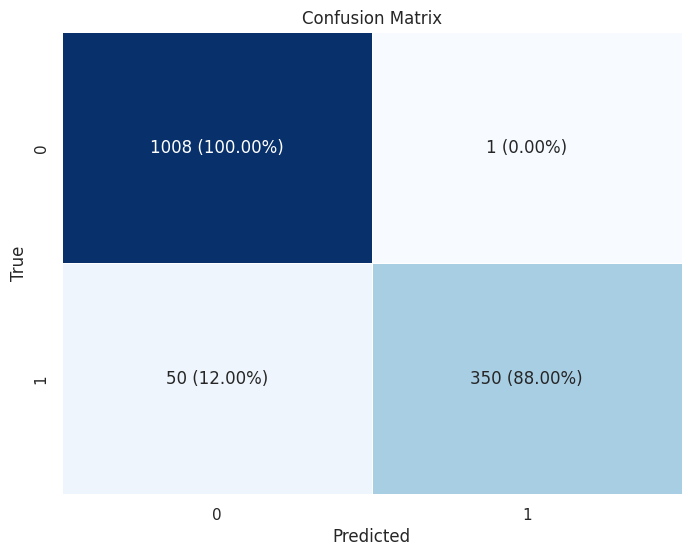

Accuracy: 96.38%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1009
           1       1.00      0.88      0.93       400

    accuracy                           0.96      1409
   macro avg       0.97      0.94      0.95      1409
weighted avg       0.97      0.96      0.96      1409



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = logreg_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Plot confusion matrix with labeled counts and percentages
percentages = (conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]).round(2) * 100
labels = [[f"{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(conf_matrix.shape[1])] for i in range(conf_matrix.shape[0])]
labels = np.asarray(labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy: {:.2%}".format(accuracy))
print("Classification Report:\n", classification_rep)

Naive Bayes

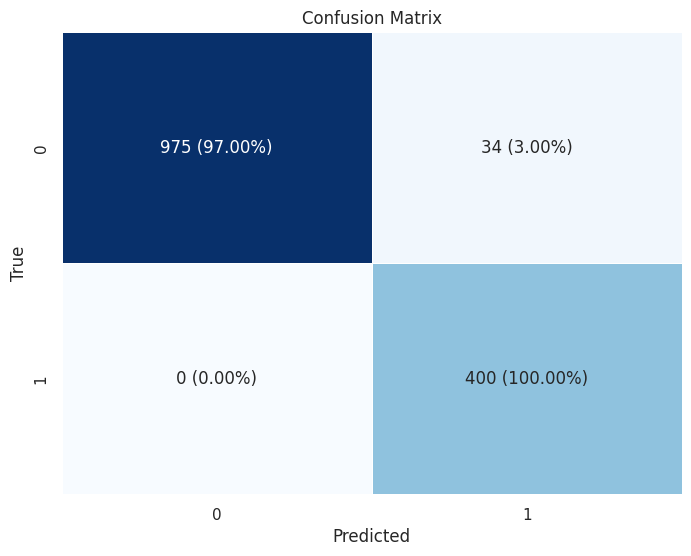

Accuracy: 97.59%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1009
           1       0.92      1.00      0.96       400

    accuracy                           0.98      1409
   macro avg       0.96      0.98      0.97      1409
weighted avg       0.98      0.98      0.98      1409



In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train_new, X_test_new, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gaussian Naive Bayes model
classifier = GaussianNB()
classifier.fit(X_train_new, y_train)

# Make predictions on the testing data
predictions = classifier.predict(X_test_new)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Plot confusion matrix with labeled counts and percentages
percentages = (conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]).round(2) * 100
labels = [[f"{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(conf_matrix.shape[1])] for i in range(conf_matrix.shape[0])]
labels = np.asarray(labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


print("Accuracy: {:.2%}".format(accuracy))
print("Classification Report:\n", classification_rep)

RandomForestClassifier

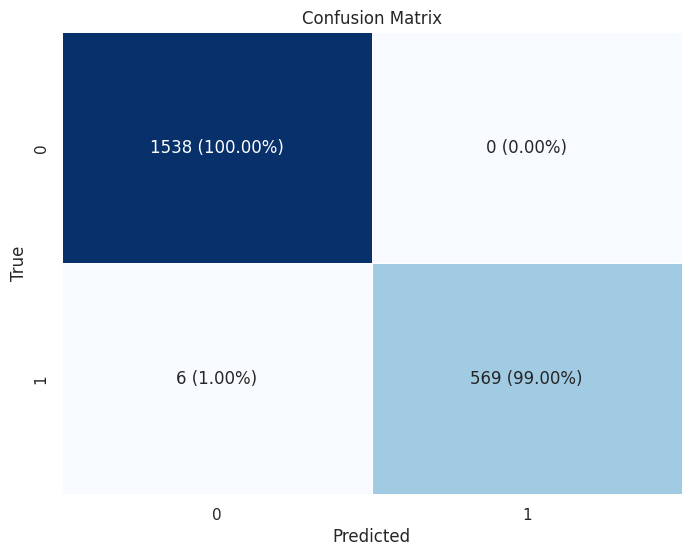

ROC AUC:  99.48%
Model accuracy:  99.72%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1538
           1       1.00      0.99      0.99       575

    accuracy                           1.00      2113
   macro avg       1.00      0.99      1.00      2113
weighted avg       1.00      1.00      1.00      2113



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Handling infinite values in the data
X.replace([np.inf, -np.inf], np.nan, inplace=True)
X.fillna(0, inplace=True)  # Replace NaN values with 0 or choose another suitable strategy

# Split the data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.3)

def train_and_evaluate_model(model, x_train, y_train, x_test, y_test):
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions on test data and calculate confusion matrix
    predictions = model.predict(x_test)
    c_matrix = confusion_matrix(y_test, predictions)

    # Calculate label percentages and create label strings with counts and percentages
    percentages = (c_matrix / np.sum(c_matrix, axis=1)[:, np.newaxis]).round(2) * 100
    labels = [[f"{c_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(c_matrix.shape[1])] for i in range(c_matrix.shape[0])]
    labels = np.asarray(labels)

    # Plot confusion matrix with labeled counts and percentages
    plt.figure(figsize=(8, 6))
    sns.heatmap(c_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=.5)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Evaluate model performance and print results
    print("ROC AUC: ", '{:.2%}'.format(roc_auc_score(y_test, predictions)))
    print("Model accuracy: ", '{:.2%}'.format(accuracy_score(y_test, predictions)))
    print(classification_report(y_test, predictions))

# Create Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)

# Train and evaluate the model
train_and_evaluate_model(rf_model, x_train, y_train, x_test, y_test)

SVM

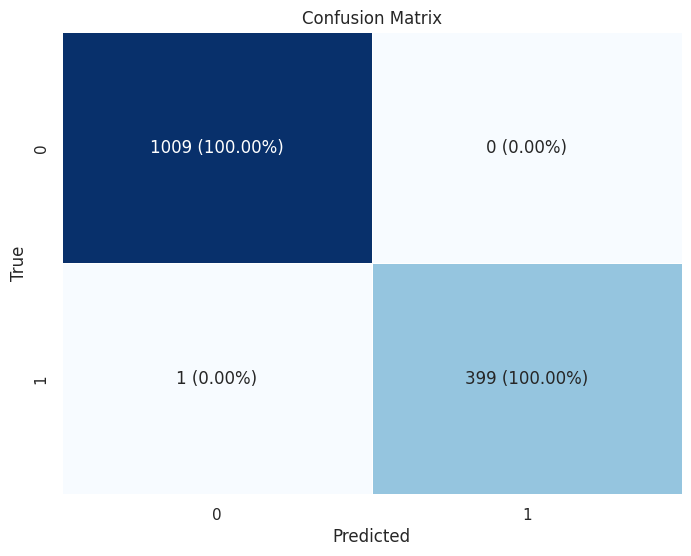

Accuracy: 99.93%
Confusion Matrix:
 [[1009    0]
 [   1  399]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1009
           1       1.00      1.00      1.00       400

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409



In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = svm_model.predict(X_test)

# Evaluate the model performance
accuracy = accuracy_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
classification_rep = classification_report(y_test, predictions)

# Plot confusion matrix with labeled counts and percentages
percentages = (conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis]).round(2) * 100
labels = [[f"{conf_matrix[i, j]} ({percentages[i, j]:.2f}%)" for j in range(conf_matrix.shape[1])] for i in range(conf_matrix.shape[0])]
labels = np.asarray(labels)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', cbar=False, linewidths=.5)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("Accuracy: {:.2%}".format(accuracy))
print("Classification Report:\n", classification_rep)